In [1]:
import psycopg2
import pandas as pd

# Configuration de la connexion
conn = psycopg2.connect(
    host="localhost",
    port="5433",
    user="guillaumedemerges",
    password="",
    dbname="bookscraper"
)

# Vérification de la connexion
cur = conn.cursor()
cur.execute("SELECT version();")
db_version = cur.fetchone()
print(f"Connected to database:\n{db_version[0]}")
cur.close()

Connected to database:
PostgreSQL 16.3 (Postgres.app) on aarch64-apple-darwin21.6.0, compiled by Apple clang version 14.0.0 (clang-1400.0.29.102), 64-bit


In [11]:
query = "SELECT * FROM books;"
df_books = pd.read_sql(query, conn)

print(df_books.head())

   id                                              title  price  stock rating  \
0   1              Sapiens: A Brief History of Humankind  54.23     20   Five   
1   2  Mesaerion: The Best Science Fiction Stories 18...  37.59     19    One   
2   3                               A Light in the Attic  51.77     22  Three   
3   4                                 Tipping the Velvet  53.74     20    One   
4   5                                      Sharp Objects  47.82     20   Four   

             category  
0             History  
1     Science Fiction  
2              Poetry  
3  Historical Fiction  
4             Mystery  


/var/folders/rt/0hb6rtq14291d__lx9m1jbd00000gn/T/ipykernel_36119/2584412686.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_books = pd.read_sql(query, conn)


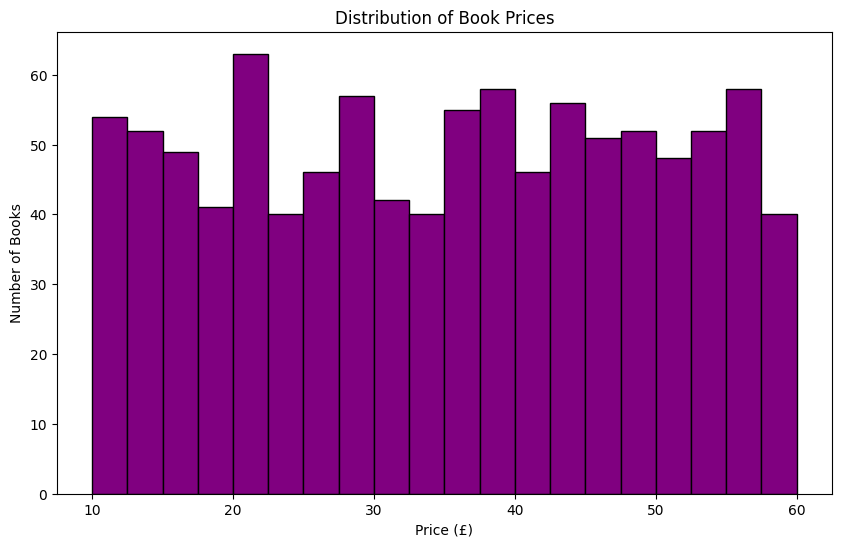

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_books['price'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.title('Distribution of Book Prices')
plt.show()

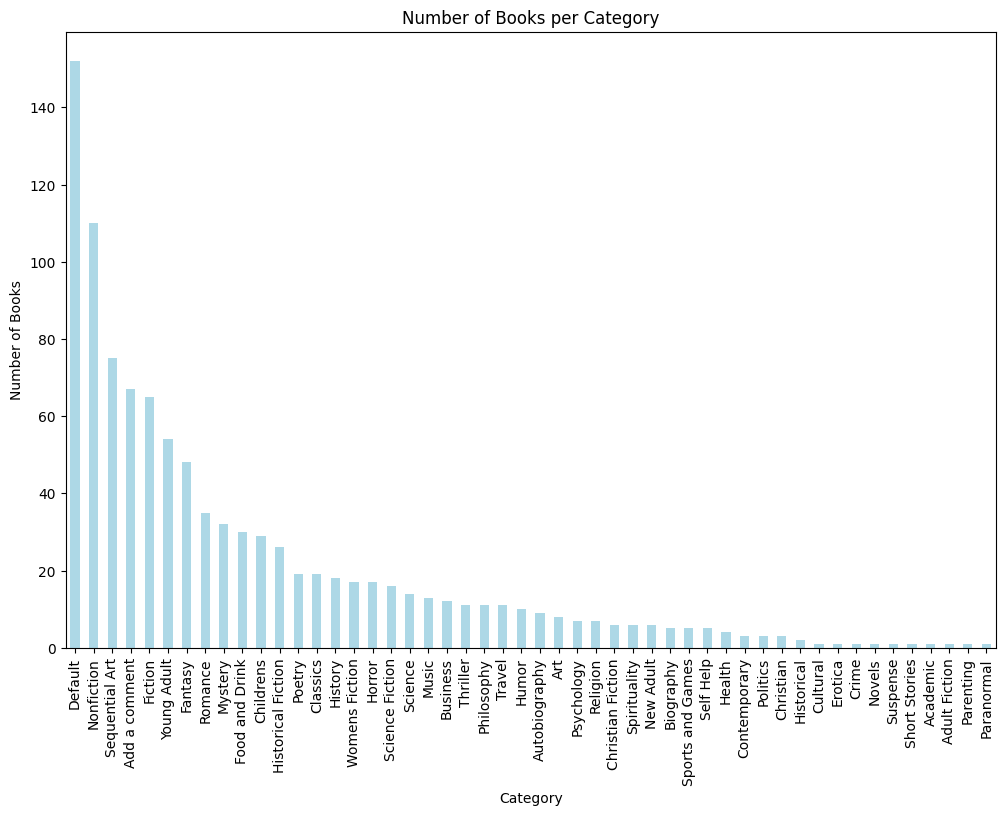

In [14]:
plt.figure(figsize=(12, 8))
df_books_per_category = df_books['category'].value_counts()
df_books_per_category.plot(kind='bar', color='lightblue')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.title('Number of Books per Category')
plt.xticks(rotation=90)
plt.show()

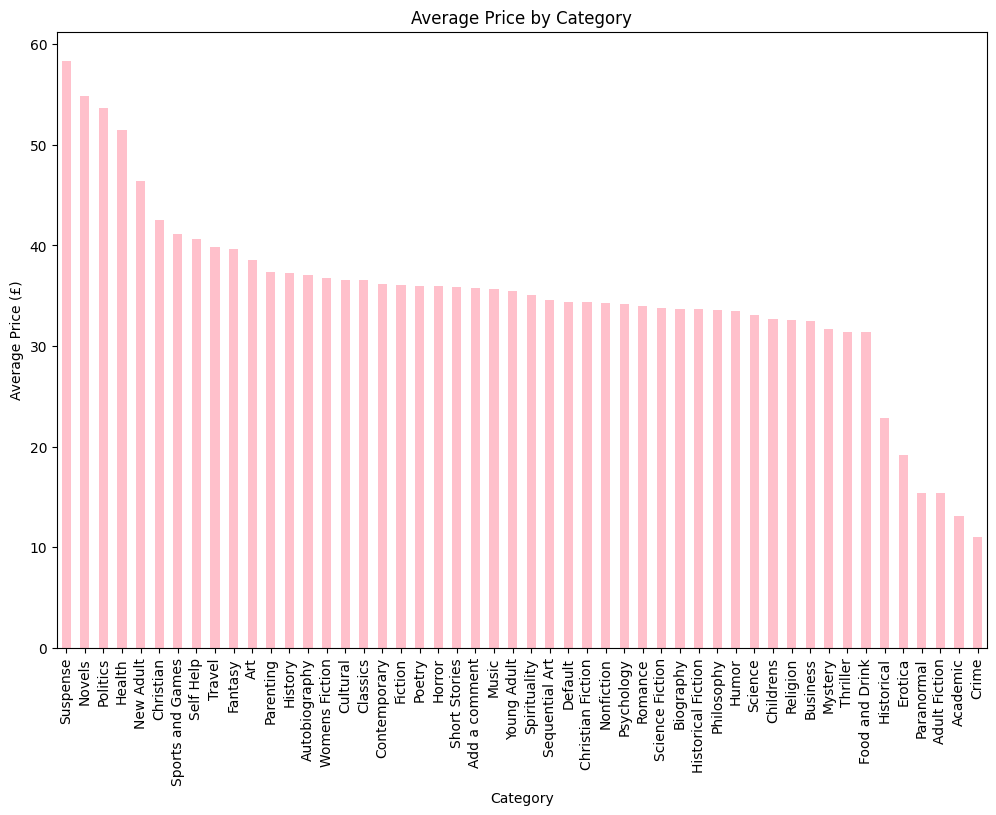

In [16]:
plt.figure(figsize=(12, 8))
df_avg_price_per_category = df_books.groupby('category')['price'].mean().sort_values(ascending=False)
df_avg_price_per_category.plot(kind='bar', color='pink')
plt.xlabel('Category')
plt.ylabel('Average Price (£)')
plt.title('Average Price by Category')
plt.xticks(rotation=90)
plt.show()

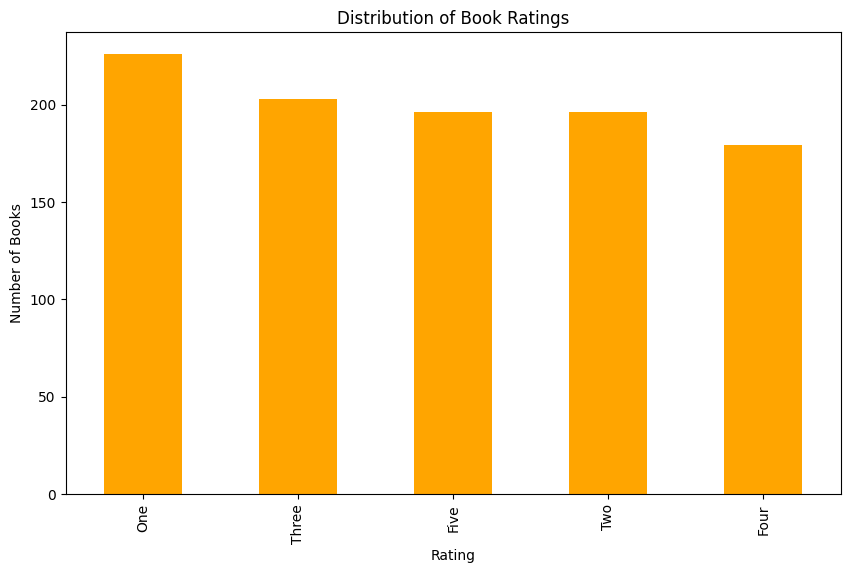

In [17]:
plt.figure(figsize=(10, 6))
df_ratings_distribution = df_books['rating'].value_counts()
df_ratings_distribution.plot(kind='bar', color='orange')
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.title('Distribution of Book Ratings')
plt.show()

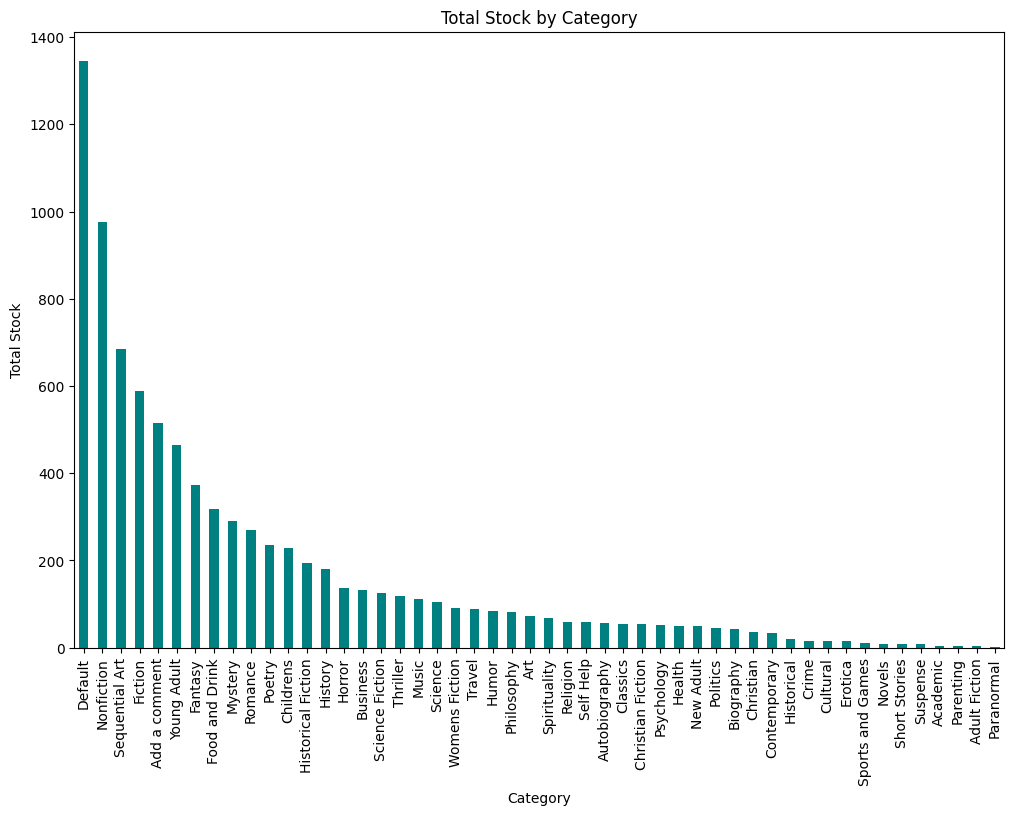

In [18]:
plt.figure(figsize=(12, 8))
df_total_stock_per_category = df_books.groupby('category')['stock'].sum().sort_values(ascending=False)
df_total_stock_per_category.plot(kind='bar', color='teal')
plt.xlabel('Category')
plt.ylabel('Total Stock')
plt.title('Total Stock by Category')
plt.xticks(rotation=90)
plt.show()

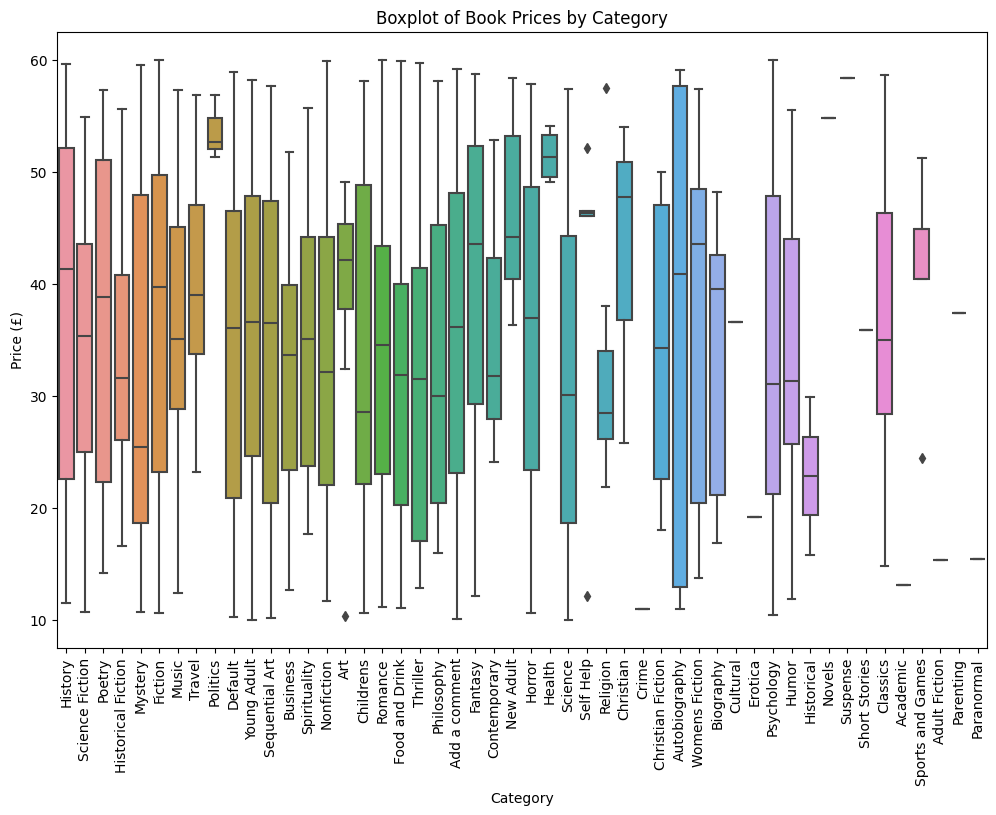

In [21]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_books, x='category', y='price')
plt.xlabel('Category')
plt.ylabel('Price (£)')
plt.title('Boxplot of Book Prices by Category')
plt.xticks(rotation=90)
plt.show()

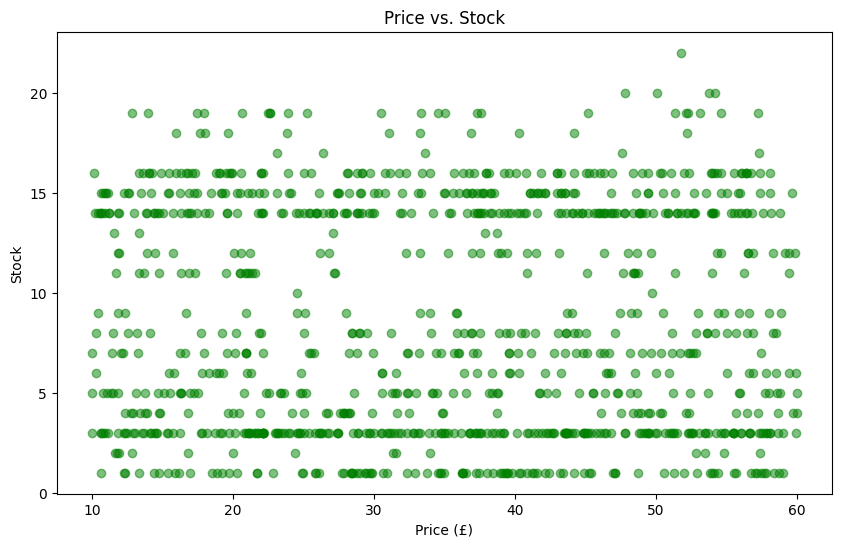

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df_books['price'], df_books['stock'], alpha=0.5, color='green')
plt.xlabel('Price (£)')
plt.ylabel('Stock')
plt.title('Price vs. Stock')
plt.show()

/var/folders/rt/0hb6rtq14291d__lx9m1jbd00000gn/T/ipykernel_36119/2365734062.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_books.corr()


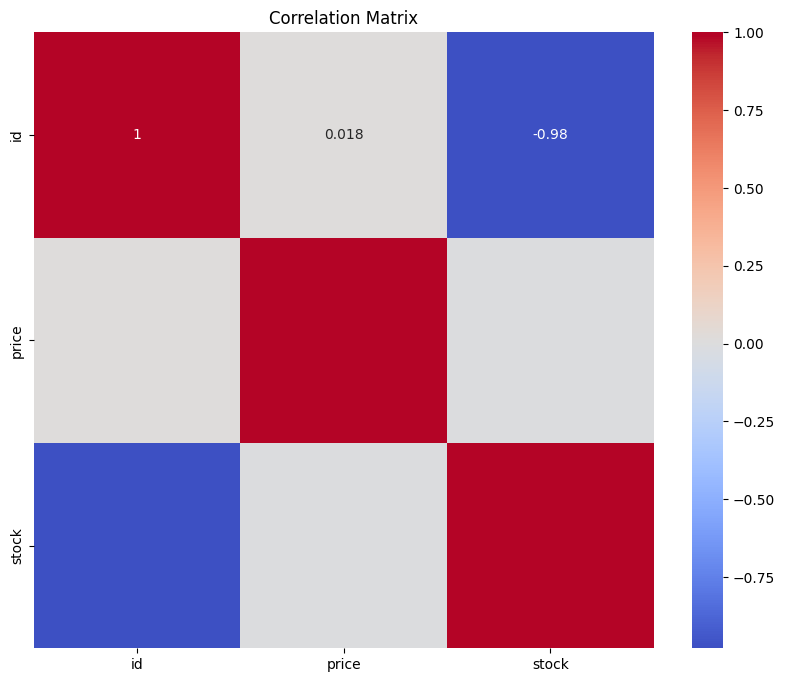

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr = df_books.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()